In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [131]:
df_client = pd.read_csv(r"C:\Users\mrdel\Desktop\BootCamp\Capstone Project\Capstone Datasets\predict-energy-behavior-of-prosumers\client.csv")

In [132]:
df_client.head()

product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1       0         43             1411.00            1   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
2  2021-09-01              2  
3  2021-09-01              2  
4  2021-09-01              2

In [133]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_type        41919 non-null  int64  
 1   county              41919 non-null  int64  
 2   eic_count           41919 non-null  int64  
 3   installed_capacity  41919 non-null  float64
 4   is_business         41919 non-null  int64  
 5   date                41919 non-null  object 
 6   data_block_id       41919 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.2+ MB


In [134]:
# As date column is object, it nedds to be converted
df_client['date'] = pd.to_datetime(df_client['date'])

In [135]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_type        41919 non-null  int64         
 1   county              41919 non-null  int64         
 2   eic_count           41919 non-null  int64         
 3   installed_capacity  41919 non-null  float64       
 4   is_business         41919 non-null  int64         
 5   date                41919 non-null  datetime64[ns]
 6   data_block_id       41919 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 2.2 MB


In [136]:
df_client.isna().sum()

product_type          0
county                0
eic_count             0
installed_capacity    0
is_business           0
date                  0
data_block_id         0
dtype: int64

In [137]:
df_client.duplicated().any(axis=0)

False

In [138]:
df_hisweather = pd.read_csv(r"C:\Users\mrdel\Desktop\BootCamp\Capstone Project\Capstone Datasets\predict-energy-behavior-of-prosumers\historical_weather.csv")

In [139]:
df_hisweather.head()

datetime  temperature  dewpoint  rain  snowfall  \
0  2021-09-01 00:00:00         14.4      12.0   0.0       0.0   
1  2021-09-01 00:00:00         14.0      12.0   0.0       0.0   
2  2021-09-01 00:00:00         14.4      12.8   0.0       0.0   
3  2021-09-01 00:00:00         15.4      13.0   0.0       0.0   
4  2021-09-01 00:00:00         15.9      12.6   0.0       0.0   

   surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
0            1015.8                 4               4               0   
1            1010.6                 7               8               0   
2            1014.9                 6               7               0   
3            1014.4                 4               2               4   
4            1013.8                12               7               0   

   cloudcover_high  windspeed_10m  winddirection_10m  shortwave_radiation  \
0                0       6.694444                  3                  0.0   
1                0       4.944444                353                  0.0   
2                0       5.833333                348                  0.0   
3                0       7.111111                349                  0.0   
4               20       8.388889                360                  0.0   

   direct_solar_radiation  diffuse_radiation  latitude  longitude  \
0                     0.0                0.0      57.6       21.7   
1                     0.0                0.0      57.6       22.2   
2                     0.0                0.0      57.6       22.7   
3                     0.0                0.0      57.6       23.2   
4                     0.0                0.0      57.6       23.7   

   data_block_id  
0              1  
1              1  
2              1  
3              1  
4              1

In [140]:
df_hisweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710800 entries, 0 to 1710799
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   datetime                object 
 1   temperature             float64
 2   dewpoint                float64
 3   rain                    float64
 4   snowfall                float64
 5   surface_pressure        float64
 6   cloudcover_total        int64  
 7   cloudcover_low          int64  
 8   cloudcover_mid          int64  
 9   cloudcover_high         int64  
 10  windspeed_10m           float64
 11  winddirection_10m       int64  
 12  shortwave_radiation     float64
 13  direct_solar_radiation  float64
 14  diffuse_radiation       float64
 15  latitude                float64
 16  longitude               float64
 17  data_block_id           int64  
dtypes: float64(11), int64(6), object(1)
memory usage: 234.9+ MB


In [141]:
# As date column is object, it nedds to be converted
df_hisweather['datetime'] = pd.to_datetime(df_hisweather['datetime'])

In [142]:
df_hisweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710800 entries, 0 to 1710799
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   datetime                datetime64[ns]
 1   temperature             float64       
 2   dewpoint                float64       
 3   rain                    float64       
 4   snowfall                float64       
 5   surface_pressure        float64       
 6   cloudcover_total        int64         
 7   cloudcover_low          int64         
 8   cloudcover_mid          int64         
 9   cloudcover_high         int64         
 10  windspeed_10m           float64       
 11  winddirection_10m       int64         
 12  shortwave_radiation     float64       
 13  direct_solar_radiation  float64       
 14  diffuse_radiation       float64       
 15  latitude                float64       
 16  longitude               float64       
 17  data_block_id           int64         
dtypes:

In [143]:
df_hisweather.isna().sum()

datetime                  0
temperature               0
dewpoint                  0
rain                      0
snowfall                  0
surface_pressure          0
cloudcover_total          0
cloudcover_low            0
cloudcover_mid            0
cloudcover_high           0
windspeed_10m             0
winddirection_10m         0
shortwave_radiation       0
direct_solar_radiation    0
diffuse_radiation         0
latitude                  0
longitude                 0
data_block_id             0
dtype: int64

In [144]:
df_hisweather.duplicated().any(axis=0)

False

In [145]:
df_train = pd.read_csv(r"C:\Users\mrdel\Desktop\BootCamp\Capstone Project\Capstone Datasets\predict-energy-behavior-of-prosumers\train.csv")

In [146]:
df_train.head()


county  is_business  product_type  target  is_consumption  \
0       0            0             1   0.713               0   
1       0            0             1  96.590               1   
2       0            0             2   0.000               0   
3       0            0             2  17.314               1   
4       0            0             3   2.904               0   

              datetime  data_block_id  row_id  prediction_unit_id  
0  2021-09-01 00:00:00              0       0                   0  
1  2021-09-01 00:00:00              0       1                   0  
2  2021-09-01 00:00:00              0       2                   1  
3  2021-09-01 00:00:00              0       3                   1  
4  2021-09-01 00:00:00              0       4                   2

In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB


In [148]:
# As date column is object, it nedds to be converted
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 138.6 MB


In [150]:
df_train.isna().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [151]:
df_train[df_train.isna().any(axis=1)]


county  is_business  product_type  target  is_consumption  \
178938        0            0             1     NaN               0   
178939        0            0             1     NaN               1   
178940        0            0             2     NaN               0   
178941        0            0             2     NaN               1   
178942        0            0             3     NaN               0   
...         ...          ...           ...     ...             ...   
1806379      15            1             0     NaN               1   
1806380      15            1             1     NaN               0   
1806381      15            1             1     NaN               1   
1806382      15            1             3     NaN               0   
1806383      15            1             3     NaN               1   

                   datetime  data_block_id   row_id  prediction_unit_id  
178938  2021-10-31 03:00:00             60   178938                   0  
178939  2021-10-31 03:00:00             60   178939                   0  
178940  2021-10-31 03:00:00             60   178940                   1  
178941  2021-10-31 03:00:00             60   178941                   1  
178942  2021-10-31 03:00:00             60   178942                   2  
...                     ...            ...      ...                 ...  
1806379 2023-03-26 03:00:00            571  1806379                  64  
1806380 2023-03-26 03:00:00            571  1806380                  59  
1806381 2023-03-26 03:00:00            571  1806381                  59  
1806382 2023-03-26 03:00:00            571  1806382                  60  
1806383 2023-03-26 03:00:00            571  1806383                  60  

[528 rows x 9 columns]

In [152]:
#df_train.isna().mean()*100
(df_train.isna().sum() / df_train.shape[0]) * 100

county                0.00000
is_business           0.00000
product_type          0.00000
target                0.02616
is_consumption        0.00000
datetime              0.00000
data_block_id         0.00000
row_id                0.00000
prediction_unit_id    0.00000
dtype: float64

In [153]:
df_train.dropna(inplace=True)

In [154]:
df_train.isna().sum()

county                0
is_business           0
product_type          0
target                0
is_consumption        0
datetime              0
data_block_id         0
row_id                0
prediction_unit_id    0
dtype: int64

In [155]:
df_train.duplicated().sum()

0

In [156]:
df_forweather = pd.read_csv(r"C:\Users\mrdel\Desktop\BootCamp\Capstone Project\Capstone Datasets\predict-energy-behavior-of-prosumers\forecast_weather.csv")

In [157]:
df_forweather.head()

latitude  longitude            origin_datetime  hours_ahead  temperature  \
0      57.6       21.7  2021-09-01 00:00:00+00:00            1    15.655786   
1      57.6       22.2  2021-09-01 00:00:00+00:00            1    13.003931   
2      57.6       22.7  2021-09-01 00:00:00+00:00            1    14.206567   
3      57.6       23.2  2021-09-01 00:00:00+00:00            1    14.844507   
4      57.6       23.7  2021-09-01 00:00:00+00:00            1    15.293848   

    dewpoint  cloudcover_high  cloudcover_low  cloudcover_mid  \
0  11.553613         0.904816        0.019714        0.000000   
1  10.689844         0.886322        0.004456        0.000000   
2  11.671777         0.729034        0.005615        0.000000   
3  12.264917         0.336304        0.074341        0.000626   
4  12.458887         0.102875        0.088074        0.000015   

   cloudcover_total  10_metre_u_wind_component  10_metre_v_wind_component  \
0          0.905899                  -0.411328                  -9.106137   
1          0.886658                   0.206347                  -5.355405   
2          0.730499                   1.451587                  -7.417905   
3          0.385468                   1.090869                  -9.163999   
4          0.176590                   1.268481                  -8.975766   

   data_block_id          forecast_datetime  direct_solar_radiation  \
0              1  2021-09-01 01:00:00+00:00                     0.0   
1              1  2021-09-01 01:00:00+00:00                     0.0   
2              1  2021-09-01 01:00:00+00:00                     0.0   
3              1  2021-09-01 01:00:00+00:00                     0.0   
4              1  2021-09-01 01:00:00+00:00                     0.0   

   surface_solar_radiation_downwards  snowfall  total_precipitation  
0                                0.0       0.0                  0.0  
1                                0.0       0.0                  0.0  
2                                0.0       0.0                  0.0  
3                                0.0       0.0                  0.0  
4                                0.0       0.0                  0.0

In [158]:
df_forweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424512 entries, 0 to 3424511
Data columns (total 18 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   latitude                           float64
 1   longitude                          float64
 2   origin_datetime                    object 
 3   hours_ahead                        int64  
 4   temperature                        float64
 5   dewpoint                           float64
 6   cloudcover_high                    float64
 7   cloudcover_low                     float64
 8   cloudcover_mid                     float64
 9   cloudcover_total                   float64
 10  10_metre_u_wind_component          float64
 11  10_metre_v_wind_component          float64
 12  data_block_id                      int64  
 13  forecast_datetime                  object 
 14  direct_solar_radiation             float64
 15  surface_solar_radiation_downwards  float64
 16  snowfall          

In [159]:
# As date column is object, it nedds to be converted
df_forweather[['forecast_datetime', 'origin_datetime']] = df_forweather[['forecast_datetime', 'origin_datetime']].apply(pd.to_datetime)


In [160]:
df_forweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424512 entries, 0 to 3424511
Data columns (total 18 columns):
 #   Column                             Dtype              
---  ------                             -----              
 0   latitude                           float64            
 1   longitude                          float64            
 2   origin_datetime                    datetime64[ns, UTC]
 3   hours_ahead                        int64              
 4   temperature                        float64            
 5   dewpoint                           float64            
 6   cloudcover_high                    float64            
 7   cloudcover_low                     float64            
 8   cloudcover_mid                     float64            
 9   cloudcover_total                   float64            
 10  10_metre_u_wind_component          float64            
 11  10_metre_v_wind_component          float64            
 12  data_block_id                      int64  

In [161]:
df_forweather.isna().sum()

latitude                             0
longitude                            0
origin_datetime                      0
hours_ahead                          0
temperature                          0
dewpoint                             0
cloudcover_high                      0
cloudcover_low                       0
cloudcover_mid                       0
cloudcover_total                     0
10_metre_u_wind_component            0
10_metre_v_wind_component            0
data_block_id                        0
forecast_datetime                    0
direct_solar_radiation               0
surface_solar_radiation_downwards    2
snowfall                             0
total_precipitation                  0
dtype: int64

In [162]:
df_forweather.isna().sum()/df_forweather.shape[0]*100

latitude                             0.000000
longitude                            0.000000
origin_datetime                      0.000000
hours_ahead                          0.000000
temperature                          0.000000
dewpoint                             0.000000
cloudcover_high                      0.000000
cloudcover_low                       0.000000
cloudcover_mid                       0.000000
cloudcover_total                     0.000000
10_metre_u_wind_component            0.000000
10_metre_v_wind_component            0.000000
data_block_id                        0.000000
forecast_datetime                    0.000000
direct_solar_radiation               0.000000
surface_solar_radiation_downwards    0.000058
snowfall                             0.000000
total_precipitation                  0.000000
dtype: float64

In [163]:
df_forweather.dropna(inplace=True)

In [164]:
df_forweather.isna().sum()

latitude                             0
longitude                            0
origin_datetime                      0
hours_ahead                          0
temperature                          0
dewpoint                             0
cloudcover_high                      0
cloudcover_low                       0
cloudcover_mid                       0
cloudcover_total                     0
10_metre_u_wind_component            0
10_metre_v_wind_component            0
data_block_id                        0
forecast_datetime                    0
direct_solar_radiation               0
surface_solar_radiation_downwards    0
snowfall                             0
total_precipitation                  0
dtype: int64

In [165]:
df_forweather.duplicated().sum()

0

In [166]:
df_eleprices = pd.read_csv(r"C:\Users\mrdel\Desktop\BootCamp\Capstone Project\Capstone Datasets\predict-energy-behavior-of-prosumers\electricity_prices.csv")

In [167]:
df_eleprices.head()

forecast_date  euros_per_mwh          origin_date  data_block_id
0  2021-09-01 00:00:00          92.51  2021-08-31 00:00:00              1
1  2021-09-01 01:00:00          88.90  2021-08-31 01:00:00              1
2  2021-09-01 02:00:00          87.35  2021-08-31 02:00:00              1
3  2021-09-01 03:00:00          86.88  2021-08-31 03:00:00              1
4  2021-09-01 04:00:00          88.43  2021-08-31 04:00:00              1

In [168]:
df_eleprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15286 entries, 0 to 15285
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   forecast_date  15286 non-null  object 
 1   euros_per_mwh  15286 non-null  float64
 2   origin_date    15286 non-null  object 
 3   data_block_id  15286 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 477.8+ KB


In [169]:
# As date column is object, it nedds to be converted
df_eleprices[['forecast_date', 'origin_date']] = df_eleprices[['forecast_date', 'origin_date']].apply(pd.to_datetime)


In [170]:
df_eleprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15286 entries, 0 to 15285
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   forecast_date  15286 non-null  datetime64[ns]
 1   euros_per_mwh  15286 non-null  float64       
 2   origin_date    15286 non-null  datetime64[ns]
 3   data_block_id  15286 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 477.8 KB


In [171]:
df_eleprices.isna().sum()

forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64

In [172]:
df_eleprices.duplicated().any(axis=0)

False

In [173]:
df_gasprices = pd.read_csv(r"C:\Users\mrdel\Desktop\BootCamp\Capstone Project\Capstone Datasets\predict-energy-behavior-of-prosumers\gas_prices.csv")

In [174]:
df_gasprices.head()

forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   
2    2021-09-03                 45.85                  46.40  2021-09-02   
3    2021-09-04                 46.30                  46.80  2021-09-03   
4    2021-09-05                 46.30                  46.58  2021-09-04   

   data_block_id  
0              1  
1              2  
2              3  
3              4  
4              5

In [175]:
df_gasprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   forecast_date          637 non-null    object 
 1   lowest_price_per_mwh   637 non-null    float64
 2   highest_price_per_mwh  637 non-null    float64
 3   origin_date            637 non-null    object 
 4   data_block_id          637 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 25.0+ KB


In [176]:
# As date column is object, it nedds to be converted
df_gasprices[['forecast_date', 'origin_date']] = df_gasprices[['forecast_date', 'origin_date']].apply(pd.to_datetime)


In [177]:
df_gasprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   forecast_date          637 non-null    datetime64[ns]
 1   lowest_price_per_mwh   637 non-null    float64       
 2   highest_price_per_mwh  637 non-null    float64       
 3   origin_date            637 non-null    datetime64[ns]
 4   data_block_id          637 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 25.0 KB


In [178]:
df_gasprices.isna().sum()

forecast_date            0
lowest_price_per_mwh     0
highest_price_per_mwh    0
origin_date              0
data_block_id            0
dtype: int64

In [179]:
df_gasprices.duplicated().any(axis=0)

False

In [180]:
df_station_to_county = pd.read_csv(r"C:\Users\mrdel\Desktop\BootCamp\Capstone Project\Capstone Datasets\predict-energy-behavior-of-prosumers\weather_station_to_county_mapping.csv")

In [181]:
df_station_to_county.head()

county_name  longitude  latitude  county
0         NaN       21.7      57.6     NaN
1         NaN       21.7      57.9     NaN
2         NaN       21.7      58.2     NaN
3         NaN       21.7      58.5     NaN
4         NaN       21.7      58.8     NaN

In [182]:
df_station_to_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   county_name  49 non-null     object 
 1   longitude    112 non-null    float64
 2   latitude     112 non-null    float64
 3   county       49 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.6+ KB


In [183]:
df_station_to_county.isna().sum()

county_name    63
longitude       0
latitude        0
county         63
dtype: int64

In [184]:
(df_station_to_county['county'].isna().sum() / len(df_station_to_county['county'])) * 100

56.25

In [185]:
print("there are", df_station_to_county.county_name.isna().sum(), "nans")
df_station_to_county.county_name.value_counts()

there are 63 nans


county_name
Harjumaa         6
Pärnumaa         5
Võrumaa          5
Saaremaa         4
Tartumaa         4
Lääne-Virumaa    4
Ida-Virumaa      4
Raplamaa         3
Viljandimaa      3
Järvamaa         3
Jõgevamaa        3
Läänemaa         2
Hiiumaa          1
Valgamaa         1
Põlvamaa         1
Name: count, dtype: int64

In [186]:
# it would be used instead of df_station_to_county.county_name
df_location=pd.read_csv(r"C:\Users\mrdel\Desktop\BootCamp\Capstone Project\Capstone Datasets\predict-energy-behavior-of-prosumers\county_lon_lats.csv")

In [187]:
df_location.head()

Unnamed: 0  county  longitude  latitude
0           0       0       24.2      59.1
1           1       0       25.2      59.1
2           2       0       23.7      59.4
3           3       0       24.2      59.4
4           4       0       24.7      59.4

In [188]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  75 non-null     int64  
 1   county      75 non-null     int64  
 2   longitude   75 non-null     float64
 3   latitude    75 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.5 KB


In [189]:
df_location.isna().sum()

Unnamed: 0    0
county        0
longitude     0
latitude      0
dtype: int64

In [190]:
import json
f = open(r"C:\Users\mrdel\Desktop\BootCamp\Capstone Project\Capstone Datasets\predict-energy-behavior-of-prosumers\county_id_to_name_map.json")
json.load(f)

{'0': 'HARJUMAA',
 '1': 'HIIUMAA',
 '2': 'IDA-VIRUMAA',
 '3': 'JÄRVAMAA',
 '4': 'JÕGEVAMAA',
 '5': 'LÄÄNE-VIRUMAA',
 '6': 'LÄÄNEMAA',
 '7': 'PÄRNUMAA',
 '8': 'PÕLVAMAA',
 '9': 'RAPLAMAA',
 '10': 'SAAREMAA',
 '11': 'TARTUMAA',
 '12': 'UNKNOWN',
 '13': 'VALGAMAA',
 '14': 'VILJANDIMAA',
 '15': 'VÕRUMAA'}

# EDA & Preprocessing
#### Exploring the content of each dataframe
* **`Type Casting and Renaming`**: The function starts by casting the latitude and longitude columns to Float32 for efficiency in df_weather_station_to_county_mapping. It also renames columns in df_gas_prices and df_electricity_prices for consistency.
* **`Aggregating Target Data`**: It aggregates target data in df_target by grouping on certain columns and summing up the targets, creating a summarized view.
* **`Weather Data Processing`**: The function processes both forecast and historical weather data (df_forecast_weather and df_historical_weather) by renaming columns, filtering, and joining with the weather station to county mapping data.
* **`Creating Average Weather Characteristics`**: It calculates average weather characteristics for both types of weather data, providing a summarized view of weather conditions.
* **`Feature Engineering and Joining Dataframes`**: The main dataframe, train_merged, is enriched with additional features through a series of join operations with other dataframes. These operations include joining lagged gas prices, client data, electricity prices, weather data, and aggregated target data.
* **`Extracting Time-Related Features`**: The function extracts and calculates various time-related features like the ordinal day, hour, and cyclical features using sine and cosine transformations.
* **`Final Dataframe Preparation`**: Finally, unnecessary columns are dropped, and the processed dataframe is returned, ready for use in predictive modeling.

***df_train***
* **county** - An ID code for the county.
* **is_business** - Boolean for whether or not the prosumer is a business.
* **product_type** - ID code with the following mapping of codes to contract types: {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}.
* **target** - The consumption or production amount for the relevant segment for the hour. The segments are defined by the county, is_business, and product_type.
* **is_consumption** - Boolean for whether or not this row's target is consumption or production.
* **datetime** - The Estonian time in EET (UTC+2) / EEST (UTC+3).
* **data_block_id** - All rows sharing the same data_block_id will be available at the same forecast time. This is a function of what information is available when forecasts are actually made, at 11 AM each morning. For example, if the forecast weather data_block_id for predictins made on October 31st is 100 then the historic weather data_block_id for October 31st will be 101 as the historic weather data is only actually available the next day.
* **row_id** - A unique identifier for the row.
* **prediction_unit_id** - A unique identifier for the county, is_business, and product_type combination. New prediction units can appear or disappear in the test set.

In [191]:
df_train_consumption = df_train[df_train["is_consumption"]==1]
monthly_consumption = df_train_consumption.groupby(pd.Grouper(key="datetime", freq='M')).mean()
weekly_consumption = df_train_consumption.groupby(pd.Grouper(key="datetime", freq='W')).mean()
daily_consumption = df_train_consumption.groupby(pd.Grouper(key="datetime", freq='D')).mean()
mean_consumption = df_train_consumption.target.mean()
df_train_production = df_train[df_train["is_consumption"]==0]
monthly_production = df_train_production.groupby(pd.Grouper(key="datetime", freq='M')).mean()
weekly_production = df_train_production.groupby(pd.Grouper(key="datetime", freq='W')).mean()
daily_production = df_train_production.groupby(pd.Grouper(key="datetime", freq='D')).mean()
mean_production = df_train_production.target.mean()

[Text(0.5, 1.0, 'distribution of target')]

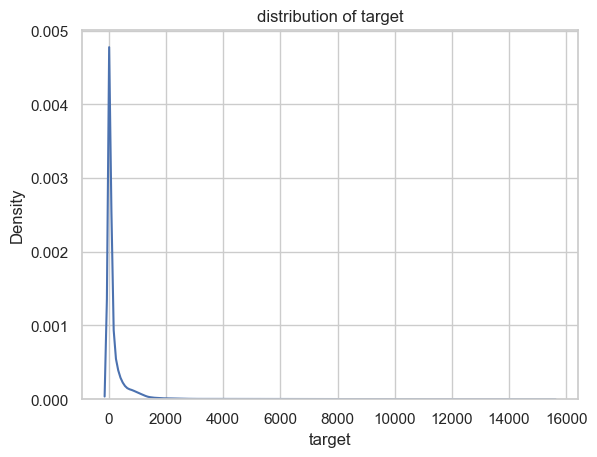

In [192]:
sns.set_style("whitegrid")
sns.kdeplot(data = df_train, x = 'target').set(title = 'distribution of target')

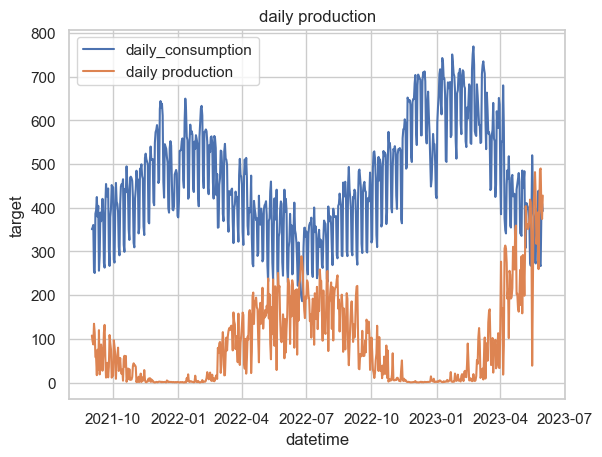

In [193]:

title = 'daily_consumption'
title1 = 'daily production'
sns.lineplot(data = daily_consumption, x = 'datetime', y = 'target',label=title).set(title = title)
sns.lineplot(data = daily_production, x = 'datetime', y = 'target',label=title1).set(title = title1)
plt.legend()
plt.show()


1. The plot shows the daily production and consumption over a period from October 2021 to July 2023. The blue line represents daily consumption, which fluctuates but generally increases over time. The orange line represents daily production, which also fluctuates and follows a similar trend as consumption but is consistently lower.
2. 
- This is a line graph titled "daily production".
- Two lines are plotted: one in blue labeled "daily_consumption" and another in orange labeled "daily production".
- The x-axis is labeled "datetime" and shows a time span from October 2021 to July 2023.
- The y-axis is labeled "target" with values ranging from 0 to 800.
- Both lines show fluctuations over the given time period.
- Daily consumption generally remains higher than daily production throughout the displayed timeframe.



[Text(0.5, 1.0, 'Target distribution splitting by consumption and production\n Consuption is much higher than production')]

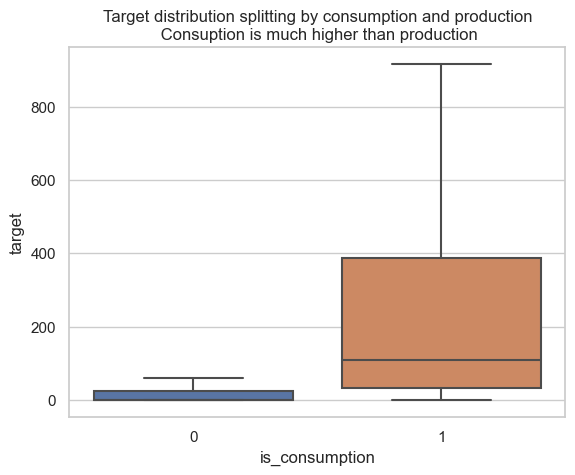

In [268]:
title = 'Target distribution splitting by consumption and production\n Consuption is much higher than production'
sns.boxplot(data = df_train, x = 'is_consumption', y = 'target', showfliers = False).set(title = title)

[Text(0.5, 1.0, 'Target distribution splitting by county\n Quite different distributions of target show up')]

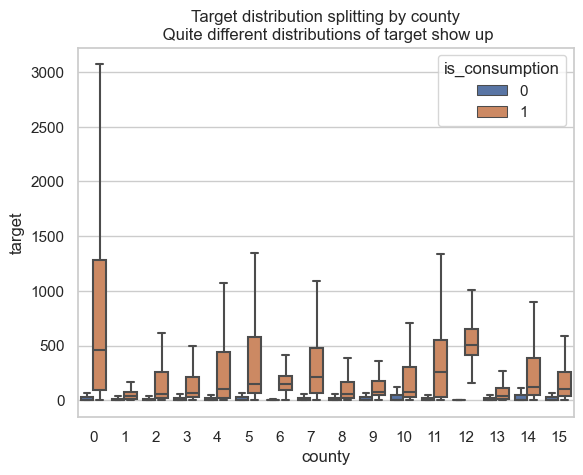

In [196]:
title = 'Target distribution splitting by county\n Quite different distributions of target show up'
sns.boxplot(data = df_train, x = 'county', y = 'target', hue = 'is_consumption', showfliers = False).set(title = title)

[Text(0.5, 1.0, 'Target distribution splitting by product_type\n Product types 0 (Combined) and 3 (Spot) show higher values of target')]

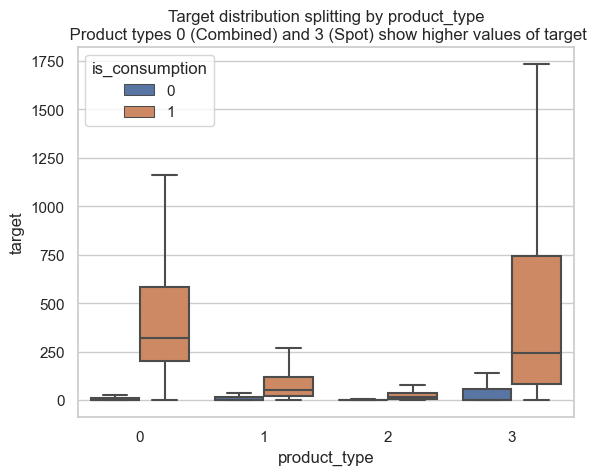

In [197]:
title = 'Target distribution splitting by product_type\n Product types 0 (Combined) and 3 (Spot) show higher values of target'
sns.boxplot(data = df_train, x = 'product_type', y = 'target', hue = 'is_consumption', showfliers = False).set(title = title)

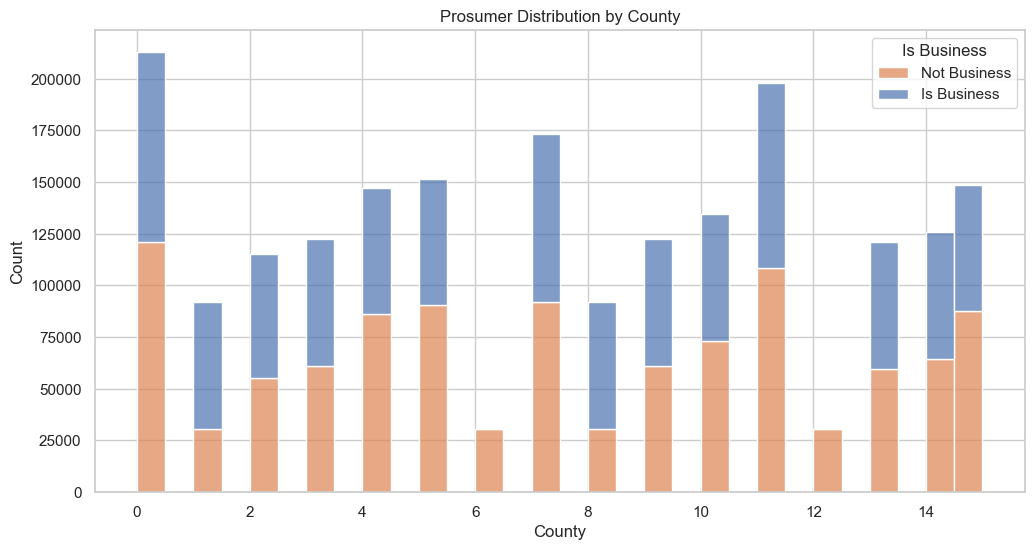

In [198]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train, x='county', hue='is_business', multiple='stack', bins=30, alpha=0.7)
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Prosumer Distribution by County')
legend_labels = ['Not Business', 'Is Business']
plt.legend(legend_labels,title='Is Business', loc='upper right')
plt.show()

***df_client***
* **product_type**
* **county** - An ID code for the county. See county_id_to_name_map.json for the mapping of ID codes to county names.
* **eic_count** - The aggregated number of consumption points (EICs - European Identifier Code).
* **installed_capacity** - Installed photovoltaic solar panel capacity in kilowatts.
* **is_business** - Boolean for whether or not the prosumer is a business.
* **date**
* **data_block_id**

[Text(0.5, 1.0, 'Installed capacity by county')]

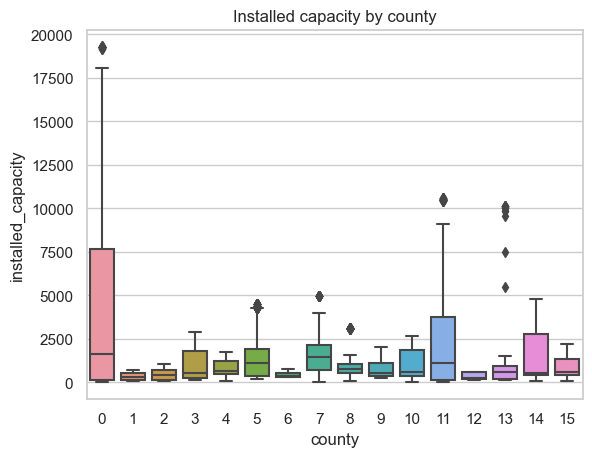

In [199]:
title = 'Installed capacity by county'
sns.boxplot(data = df_client, x = 'county', y = 'installed_capacity').set(title = title)

[Text(0.5, 1.0, 'Eic count by county\n Notice the correlation between the Eic count and the consumption plotted before:\n counties 0, 7, 11 have high consumption but also high Eic count!')]

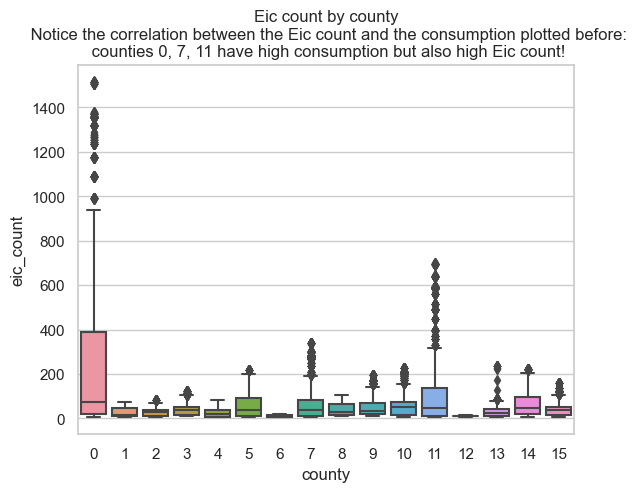

In [200]:
title = 'Eic count by county\n Notice the correlation between the Eic count and the consumption plotted before:\n \
counties 0, 7, 11 have high consumption but also high Eic count!'
sns.boxplot(data = df_client, x = 'county', y = 'eic_count').set(title = title)

***df_gasprices***
* **origin_date** - The date when the day-ahead prices became available.
* **forecast_date** - The date when the forecast prices should be relevant.
* **[lowest/highest]_price_per_mwh** - The lowest/highest price of natural gas that on the day ahead market that trading day, in Euros per megawatt hour equivalent.
* **data_block_id**

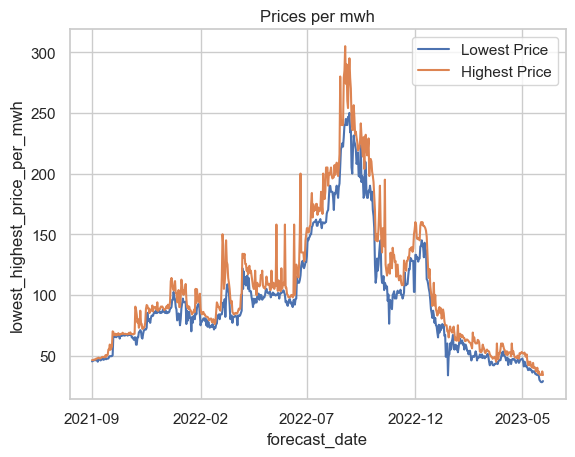

In [201]:
import matplotlib.dates as mdates
title = 'Prices per mwh'
ax = sns.lineplot(data=df_gasprices, x='forecast_date', y='lowest_price_per_mwh', label='Lowest Price')
sns.lineplot(data=df_gasprices, x='forecast_date', y='highest_price_per_mwh', label='Highest Price')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
ax.set(title=title, ylabel='lowest_highest_price_per_mwh')
plt.legend()

plt.show()


***df_eleprices***

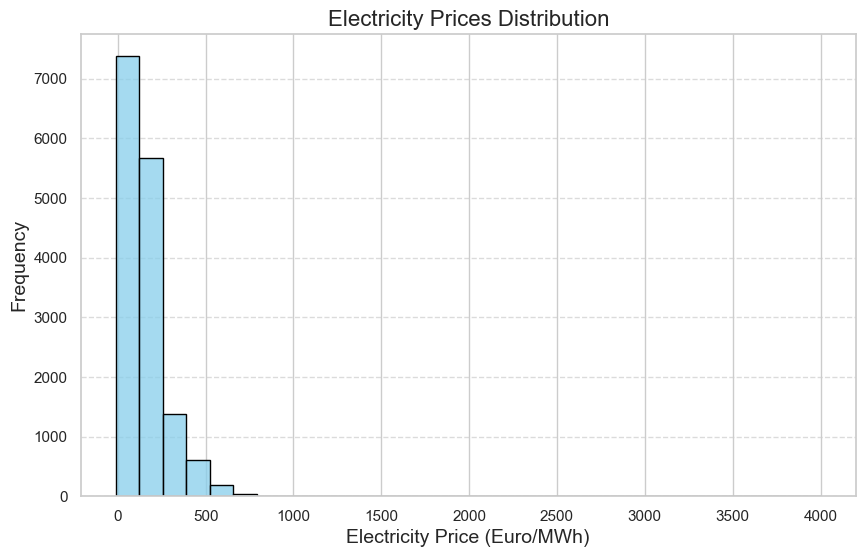

In [202]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_eleprices['euros_per_mwh'], bins=30, kde=False, color='skyblue', edgecolor='black')

plt.title('Electricity Prices Distribution', fontsize=16)
plt.xlabel('Electricity Price (Euro/MWh)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. This plot shows the distribution of electricity prices. The x-axis represents the electricity price in Euro per MWh, and the y-axis represents the frequency of each price range. Most of the prices are concentrated between 0 to 500 Euro/MWh, with a very high frequency reaching up to 7000. The frequency decreases sharply as the price increases.

2. 
- The image is a bar graph titled "Electricity Prices Distribution."
- The x-axis is labeled "Electricity Price (Euro/MWh)" and ranges from 0 to 4000.
- The y-axis is labeled "Frequency" and ranges from 0 to 7000.
- There are five bars in total, with different heights indicating their frequencies.
- The first bar, representing prices from 0 to around 250 Euro/MWh, has the highest frequency reaching up to approximately 7000.
- Frequencies decrease sharply for higher price ranges; for instance, prices between around 250 and 500 Euro/MWh have a frequency of about half compared to the first bar.
- Bars representing prices above approximately 1000 Euro/MWh have negligible frequencies.

[Text(0.5, 1.0, 'Price per mwh')]

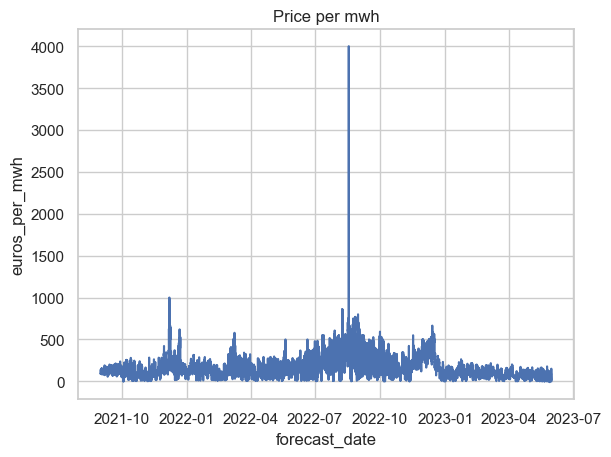

In [203]:
title = 'Price per mwh'
ax = sns.lineplot(data = df_eleprices, x = 'forecast_date', y = 'euros_per_mwh')
ax.set(title = title)
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))

***df_forweather***
* **[latitude/longitude]** - The coordinates of the weather forecast.
* **origin_datetime** - The timestamp of when the forecast was generated.
* **hours_ahead** - The number of hours between the forecast generation and the forecast weather. Each forecast covers 48 hours in total.
* **temperature** - The air temperature at 2 meters above ground in degrees Celsius.
* **dewpoint** - The dew point temperature at 2 meters above ground in degrees Celsius.
* **cloudcover_[low/mid/high/total]** - The percentage of the sky covered by clouds in the following altitude bands: 0-2 km, 2-6, 6+, and total.
* **10metre[u/v]_wind_component** - The [eastward/northward] component of wind speed measured 10 meters above surface in meters per second.
* **data_block_id**
* **forecast_datetime** - The timestamp of the predicted weather. Generated from origin_datetime plus hours_ahead.
* **direct_solar_radiation** - The direct solar radiation reaching the surface on a plane perpendicular to the direction of the Sun accumulated during the preceding hour, in watt-hours per square meter.
* **surface_solar_radiation_downwards** - The solar radiation, both direct and diffuse, that reaches a horizontal plane at the surface of the Earth, in watt-hours per square meter.
* **snowfall** - Snowfall over the previous hour in units of meters of water equivalent.
* **total_precipitation** - The accumulated liquid, comprising rain and snow that falls on Earth's surface over the preceding hour, in units of meters.
---

#### I would like to check that each latitude/longitude combination here has a match in the df_station_to_county dataframe

In [204]:
df_station_to_county['size'] = 5

fig = px.scatter_mapbox(
    df_station_to_county, 
    lat="latitude", 
    lon="longitude", 
    color="county",
    size='size',
    zoom=6,
    title='Weather Stations Locations'
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

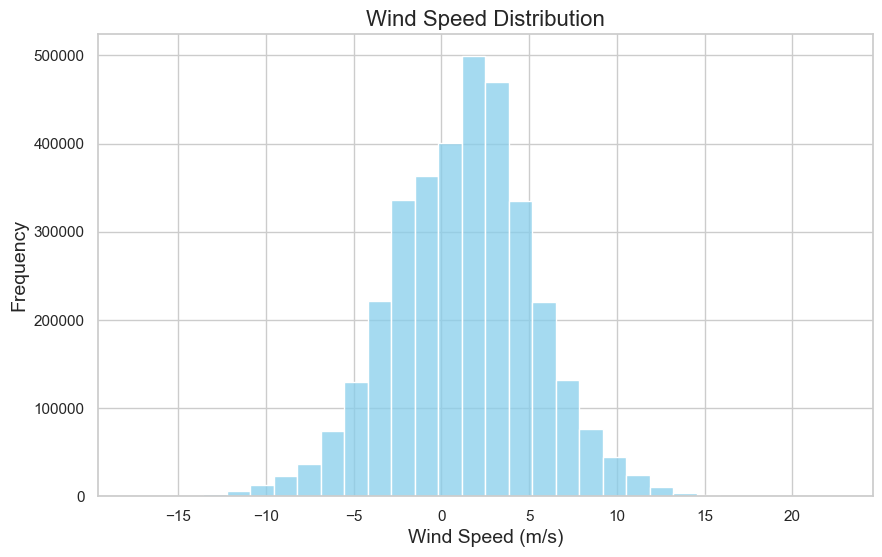

In [205]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_forweather['10_metre_u_wind_component'], bins=30, kde=False, color='skyblue')

plt.title('Wind Speed Distribution', fontsize=16)
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

### df_hisweather
* **datetime**
* **temperature**
* **dewpoint**
* **rain** - Different from the forecast conventions. The rain from large scale weather systems of the preceding hour in millimeters.
* **snowfall** - Different from the forecast conventions. Snowfall over the preceding hour in centimeters.
* **surface_pressure** - The air pressure at surface in hectopascals.
* **cloudcover_[low/mid/high/total]** - Different from the forecast conventions. Cloud cover at 0-3 km, 3-8, 8+, and total.
* **windspeed_10m** - Different from the forecast conventions. The wind speed at 10 meters above ground in meters per second.
* **winddirection_10m** - Different from the forecast conventions. The wind direction at 10 meters above ground in degrees.
* **shortwave_radiation** - Different from the forecast conventions. The global horizontal irradiation in watt-hours per square meter.
* **direct_solar_radiation**
* **diffuse_radiation** - Different from the forecast conventions. The diffuse solar irradiation in watt-hours per square meter.
* **[latitude/longitude]** - The coordinates of the weather station.
data_block_id

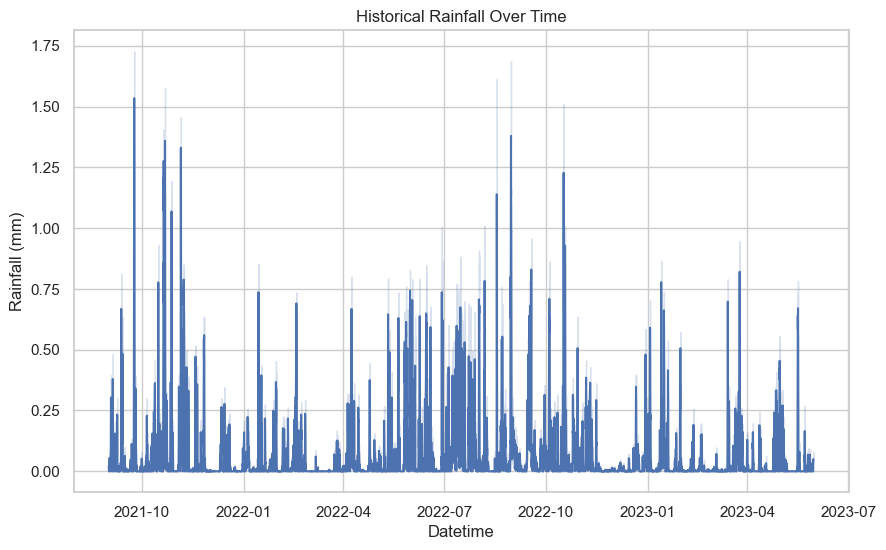

In [206]:
#plt.figure(figsize=(10, 6))
#sns.lineplot(data=df_hisweather, x='datetime', y='rain')
#plt.title('Historical Rainfall Over Time')
#plt.xlabel('Datetime')
#plt.ylabel('Rainfall (mm)')
#plt.show()

# Checking Correlation in Train dataset

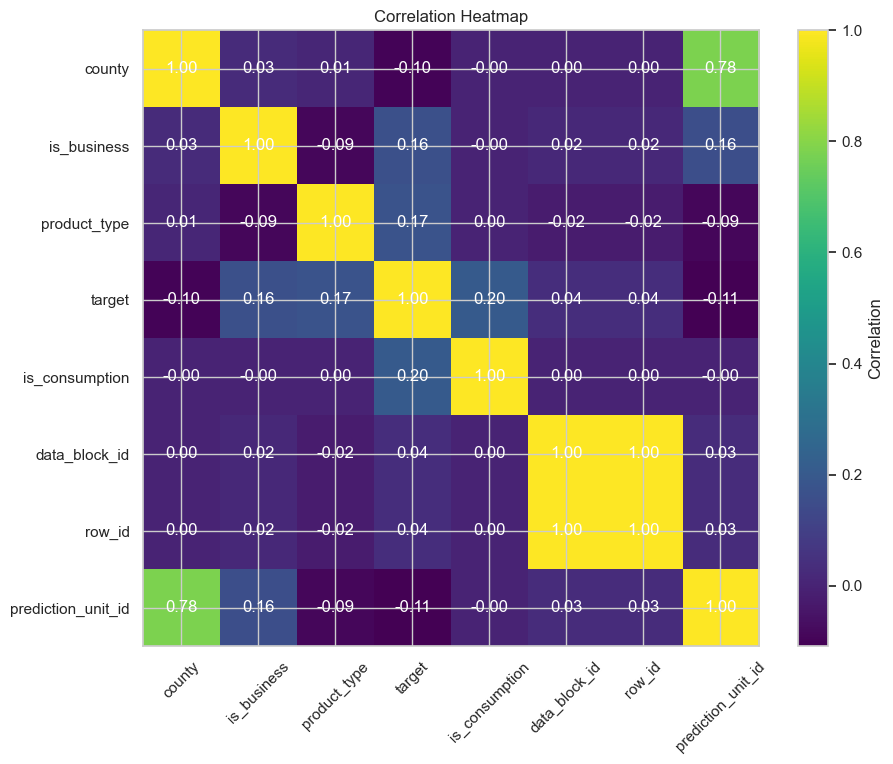

In [209]:

cols = [c for c in df_train.columns if c not in ["datetime", "date"]]

correlation_matrix = df_train[cols].corr()

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlation_matrix, cmap="viridis", interpolation="none")

# Display correlation values in each cell
for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar(heatmap, label="Correlation")
plt.xticks(np.arange(len(cols)), cols, rotation=45)
plt.yticks(np.arange(len(cols)), cols)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#fig, axes = plt.subplots(4, 3, figsize=(20, 15))
#title = 'Some indicators for a randomly chosen station'

# List of columns to plot
#columns_to_plot = ['temperature', 'dewpoint', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_high', 
                   #'cloudcover_total', '10_metre_u_wind_component', '10_metre_v_wind_component',
                   #'direct_solar_radiation', 'surface_solar_radiation_downwards', 'snowfall', 
                   #'total_precipitation']

#for i, column in enumerate(columns_to_plot):
    #ax = axes[i // 3, i % 3]
    #sns.lineplot(data=df_forweather, x='forecast_datetime', y=column, ax=ax)
    #ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
    #ax.set_title(column)  # Set subplot title to the column name

# Adjust layout and add a main title
#plt.suptitle(title)
#plt.tight_layout()
#plt.show()

In [210]:
#Renaming (forecast_date) to (datetime) for merging with the train data later
df_eleprices =df_eleprices.rename(columns= {'forecast_date' : 'datetime'})

In [211]:
#Decreasing (data_block_id) in client data because it's 2 steps ahead from train's data (data_block_id)
df_client['data_block_id'] -= 2

In [212]:
 """locations is a custom data that will help replace (latitude) and (longitude)
    columns by the counties for each coordination | you can find the data in Input """
df_location=df_location.drop('Unnamed: 0', axis= 1) 

In [214]:
#Rounding the (latitude) and (longitude) for 1 decimal fraction
df_forweather[['latitude', 'longitude']] = df_forweather[['latitude','longitude']].astype(float).round(1)
        
#Merging counties in locations data with the coordinations in the forecast_weather data
df_forweather= df_forweather.merge(df_location, how='left',on=['longitude','latitude'])
        
#dropping nan values
df_forweather.dropna(axis= 0, inplace= True)    
    
#Converting (county) column to integer
df_forweather['county'] = df_forweather['county'].astype('int64')
    
#Dropping the columns we won't need | We will use the (forecast_datetime) column instead of the (origin_datetime)
df_forweather.drop(['origin_datetime', 'latitude','longitude', 'hours_ahead', 'data_block_id'], axis=1, inplace= True)
    
#Renaming (forecast_datetime) to (datetime) for merging with the train data later
df_forweather.rename(columns={'forecast_datetime': 'datetime'}, inplace= True)
    
#Converting (datetime) column to datetime
df_forweather['datetime']= pd.to_datetime(df_forweather['datetime'], utc= True)
    
#Grouping all forecast_weather columns mean values by hour, So each hour will have the mean values of the forecast_weather columns
forecast_weather_datetime= df_forweather.groupby([df_forweather['datetime'].dt.to_period('h')])[list(df_forweather.drop(['county','datetime'], axis= 1).columns)].mean().reset_index()
    
#After converting the (datetime) column to hour period for the groupby we convert it back to datetime
forecast_weather_datetime['datetime']= pd.to_datetime(forecast_weather_datetime['datetime'].dt.to_timestamp(), utc=True)
    
#Grouping all forecast_weather columns mean values by hour and county, So each hour and county will have the mean values of the forecast_weather columns for each county. 
forecast_weather_datetime_county= df_forweather.groupby(['county',df_forweather['datetime'].dt.to_period('h')])[list(df_forweather.drop(['county','datetime'], axis= 1).columns)].mean().reset_index()
    
#After converting the (datetime) column to hour period for the groupby we convert it back to datetime
forecast_weather_datetime_county['datetime']= pd.to_datetime(forecast_weather_datetime_county['datetime'].dt.to_timestamp(), utc=True)

C:\Users\mrdel\AppData\Local\Temp\ipykernel_11424\3383276969.py:23: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\mrdel\AppData\Local\Temp\ipykernel_11424\3383276969.py:29: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [217]:
#Rounding the (latitude) and (longitude) for 1 decimal fraction           
df_hisweather[['latitude', 'longitude']] = df_hisweather[['latitude', 'longitude']].astype(float).round(1)

#Merging counties in locations data with the coordinations in the historical_weather data
df_hisweather= df_hisweather.merge(df_location, how='left', on=['longitude','latitude'])    
    
#Dropping nan values
df_hisweather.dropna(axis= 0, inplace= True)
    
#Dropping the columns we won't need
df_hisweather.drop(['latitude', 'longitude'], axis=1, inplace= True)
    
#Converting (county) to integer
df_hisweather['county'] = df_hisweather['county'].astype('int64')
    
#Converting (datetime) column to datetime
df_hisweather['datetime']= pd.to_datetime(df_hisweather['datetime'], utc= True)
    
#Grouping all historical_weather columns mean values by hour, So each hour will have the mean values of the historical_weather columns"""     
hist_weather_datetime= df_hisweather.groupby([df_hisweather['datetime'].dt.to_period('h')])[list(df_hisweather.drop(['county','datetime','data_block_id'], axis= 1).columns)].mean().reset_index()    
    
#After converting the (datetime) column to hour period for the groupby we convert it back to datetime
hist_weather_datetime['datetime']= pd.to_datetime(hist_weather_datetime['datetime'].dt.to_timestamp(), utc=True)
    
#Merging (data_block_id) back after dropping it in the last step | (data_block_id will be used to merge with train data)
hist_weather_datetime= hist_weather_datetime.merge(df_hisweather[['datetime', 'data_block_id']], how='left', on='datetime')
    
#Grouping all historical_weather columns mean values by hour and county, So each hour will have the mean values of the historical_weather columns for each county"""   
hist_weather_datetime_county= df_hisweather.groupby(['county',df_hisweather['datetime'].dt.to_period('h')])[list(df_hisweather.drop(['county','datetime', 'data_block_id'], axis= 1).columns)].mean().reset_index() 
    
#After converting the (datetime) column to hour period for the groupby we convert it back to datetime
hist_weather_datetime_county['datetime']= pd.to_datetime(hist_weather_datetime_county['datetime'].dt.to_timestamp(), utc=True)
    
#Merging (data_block_id) back after dropping it in the last step
hist_weather_datetime_county= hist_weather_datetime_county.merge(df_hisweather[['datetime', 'data_block_id']], how='left', on='datetime')

C:\Users\mrdel\AppData\Local\Temp\ipykernel_11424\2466305496.py:20: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\mrdel\AppData\Local\Temp\ipykernel_11424\2466305496.py:29: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [219]:
forecast_weather_datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   datetime                           15312 non-null  datetime64[ns, UTC]
 1   temperature                        15312 non-null  float64            
 2   dewpoint                           15312 non-null  float64            
 3   cloudcover_high                    15312 non-null  float64            
 4   cloudcover_low                     15312 non-null  float64            
 5   cloudcover_mid                     15312 non-null  float64            
 6   cloudcover_total                   15312 non-null  float64            
 7   10_metre_u_wind_component          15312 non-null  float64            
 8   10_metre_v_wind_component          15312 non-null  float64            
 9   direct_solar_radiation             15312 non-null 

In [220]:
forecast_weather_datetime['datetime'] = pd.to_datetime(forecast_weather_datetime['datetime']).dt.tz_localize(None)

In [222]:
forecast_weather_datetime_county['datetime'] = pd.to_datetime(forecast_weather_datetime_county['datetime']).dt.tz_localize(None)

In [223]:
#Adding year column in train data
df_train['year'] = df_train['datetime'].dt.year
    
#Adding month column in train data
df_train['month'] =df_train['datetime'].dt.month
    
#Adding day column in train data
df_train['day'] = df_train['datetime'].dt.day
    
#Adding hour column in train data
df_train['hour'] = df_train['datetime'].dt.hour
    
#Adding dayofweek column in train data
df_train['dayofweek'] = df_train['datetime'].dt.dayofweek
    
#Adding dayofyear column in train data
df_train['dayofyear']= df_train['datetime'].dt.dayofyear
    
#Adding hour column to electricity used to merge with the train data
df_eleprices['hour'] = df_eleprices['datetime'].dt.hour

#Merging train data with client data
train_merged= df_train.merge(df_client.drop(columns = ['date']), how='left', on=['data_block_id', 'county', 'is_business', 'product_type'])
    
#Merging train data with gas data
train_merged= train_merged.merge(df_gasprices[['data_block_id', 'lowest_price_per_mwh', 'highest_price_per_mwh']], how='left', on='data_block_id')
    
#Merging train data with electricity data    
train_merged= train_merged.merge(df_eleprices[['euros_per_mwh', 'hour', 'data_block_id']], how='left', on=['hour', 'data_block_id'])
    
#Merging train data with forecast_weather_datetime data    
train_merged= train_merged.merge(forecast_weather_datetime, how='left', on=['datetime'])
    
#Merging train data with forecast_weather_datetime_county data    
train_merged= train_merged.merge(forecast_weather_datetime_county, how='left', on=['datetime', 'county'],
                     suffixes= ('_fcast_mean','_fcast_mean_by_county'))
    
#Creating hour columns in both historical_weather data | used to merge both data with the train data
hist_weather_datetime['hour']= hist_weather_datetime['datetime'].dt.hour
hist_weather_datetime_county['hour']= hist_weather_datetime_county['datetime'].dt.hour

#Dropping duplicates and (datetime) column
hist_weather_datetime.drop_duplicates(inplace=True)
hist_weather_datetime_county.drop_duplicates(inplace=True)
hist_weather_datetime.drop('datetime', axis= 1, inplace= True)
hist_weather_datetime_county.drop('datetime', axis= 1, inplace= True)

#Merging hist_weather_datetime with train data
train_merged= train_merged.merge(hist_weather_datetime, how='left', on=['data_block_id', 'hour'])

#Merging hist_weather_datetime_county with train data
train_merged= train_merged.merge(hist_weather_datetime_county, how='left', on=['data_block_id', 'county', 'hour'],
                     suffixes= ('_hist_mean','_hist_mean_by_county'))

In [224]:
train_merged.head()

county  is_business  product_type  target  is_consumption   datetime  \
0       0            0             1   0.713               0 2021-09-01   
1       0            0             1  96.590               1 2021-09-01   
2       0            0             2   0.000               0 2021-09-01   
3       0            0             2  17.314               1 2021-09-01   
4       0            0             3   2.904               0 2021-09-01   

   data_block_id  row_id  prediction_unit_id  year  ...  \
0              0       0                   0  2021  ...   
1              0       1                   0  2021  ...   
2              0       2                   1  2021  ...   
3              0       3                   1  2021  ...   
4              0       4                   2  2021  ...   

   surface_pressure_hist_mean_by_county  cloudcover_total_hist_mean_by_county  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

   cloudcover_low_hist_mean_by_county  cloudcover_mid_hist_mean_by_county  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   cloudcover_high_hist_mean_by_county  windspeed_10m_hist_mean_by_county  \
0                                  NaN                                NaN   
1                                  NaN                                NaN   
2                                  NaN                                NaN   
3                                  NaN                                NaN   
4                                  NaN                                NaN   

   winddirection_10m_hist_mean_by_county  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   shortwave_radiation_hist_mean_by_county  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   direct_solar_radiation_hist_mean_by_county  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   diffuse_radiation_hist_mean_by_county  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  

[5 rows x 72 columns]

In [225]:
train_merged.isna().sum()

county                                            0
is_business                                       0
product_type                                      0
target                                            0
is_consumption                                    0
                                              ...  
windspeed_10m_hist_mean_by_county             35056
winddirection_10m_hist_mean_by_county         35056
shortwave_radiation_hist_mean_by_county       35056
direct_solar_radiation_hist_mean_by_county    35056
diffuse_radiation_hist_mean_by_county         35056
Length: 72, dtype: int64

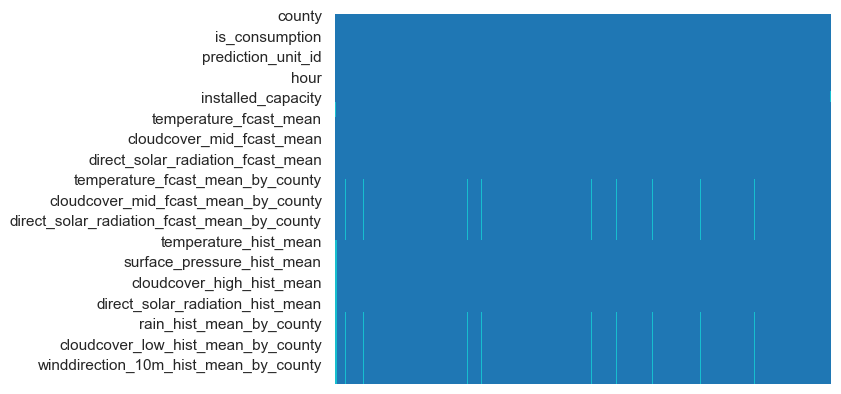

In [226]:
plt.figure()

ax = sns.heatmap(train_merged.isna().T, cmap="tab10", cbar=False)
ax.set(xticklabels=[]) # turn off tick marks

plt.show()

There are no apparent long runs of adjacent missing values, and we cannot spot any concerning patterns. We choose to fill in the missing values using forward filling.

In [227]:
#Filling nan values with hourly mean values for each column | Helps for the county missing value 
train_merged= train_merged.groupby(['year', 'day', 'hour'], as_index=False).apply(lambda x: x.ffill().bfill()).reset_index()

In [228]:
train_merged.isna().sum()

level_0                                       0
level_1                                       0
county                                        0
is_business                                   0
product_type                                  0
                                             ..
windspeed_10m_hist_mean_by_county             0
winddirection_10m_hist_mean_by_county         0
shortwave_radiation_hist_mean_by_county       0
direct_solar_radiation_hist_mean_by_county    0
diffuse_radiation_hist_mean_by_county         0
Length: 74, dtype: int64

In [229]:
#Dropping uneeded data
train_merged.drop(['level_0', 'level_1', 'row_id', 'data_block_id', 'year'], axis= 1, inplace= True)

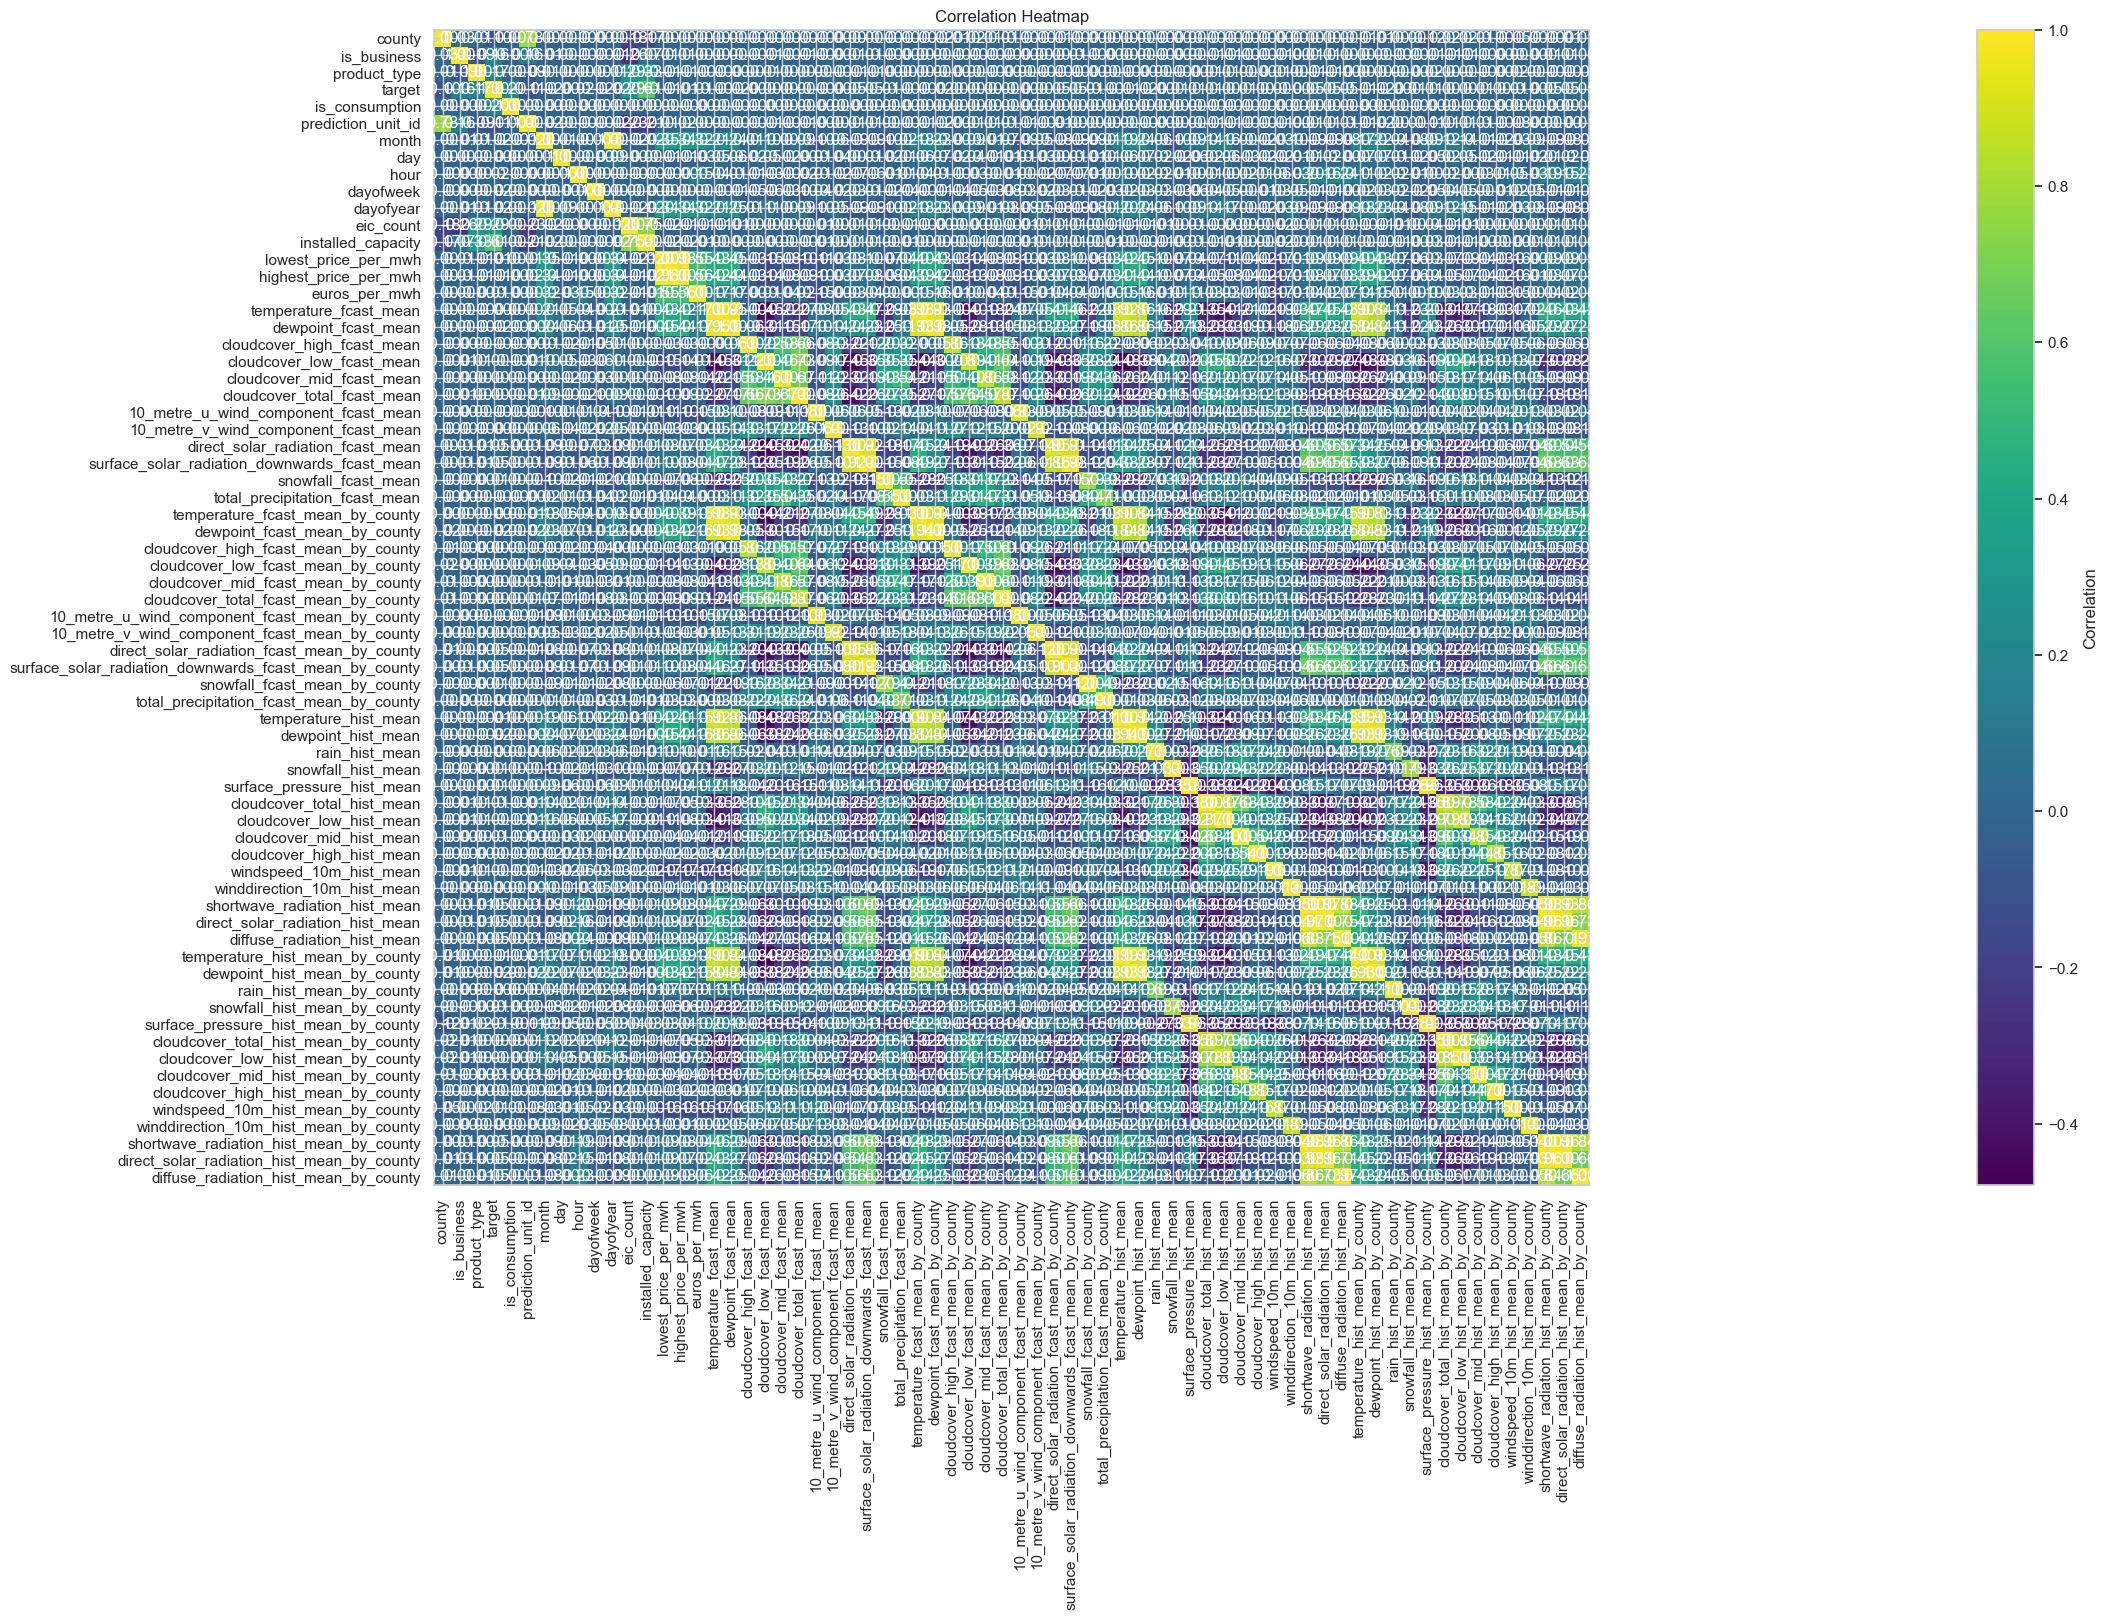

In [246]:
cols = [c for c in train_merged.columns if c not in ["datetime"]]

correlation_matrix = train_merged[cols].corr()

plt.figure(figsize=(100,15))
heatmap = plt.imshow(correlation_matrix, cmap="viridis", interpolation="none")

# Display correlation values in each cell
for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar(heatmap, label="Correlation")
plt.xticks(np.arange(len(cols)), cols, rotation=90)
plt.yticks(np.arange(len(cols)), cols)
plt.title("Correlation Heatmap")
plt.show()

In [237]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017824 entries, 0 to 2017823
Data columns (total 69 columns):
 #   Column                                                  Dtype         
---  ------                                                  -----         
 0   county                                                  int64         
 1   is_business                                             int64         
 2   product_type                                            int64         
 3   target                                                  float64       
 4   is_consumption                                          int64         
 5   datetime                                                datetime64[ns]
 6   prediction_unit_id                                      int64         
 7   month                                                   int32         
 8   day                                                     int32         
 9   hour                                          

In [238]:
train_merged.shape

(2017824, 69)

In [239]:
train_merged.head()

county  is_business  product_type  target  is_consumption   datetime  \
0       0            0             1   0.713               0 2021-09-01   
1       0            0             1  96.590               1 2021-09-01   
2       0            0             2   0.000               0 2021-09-01   
3       0            0             2  17.314               1 2021-09-01   
4       0            0             3   2.904               0 2021-09-01   

   prediction_unit_id  month  day  hour  ...  \
0                   0      9    1     0  ...   
1                   0      9    1     0  ...   
2                   1      9    1     0  ...   
3                   1      9    1     0  ...   
4                   2      9    1     0  ...   

   surface_pressure_hist_mean_by_county  cloudcover_total_hist_mean_by_county  \
0                                1028.7                                  84.6   
1                                1028.7                                  84.6   
2                                1028.7                                  84.6   
3                                1028.7                                  84.6   
4                                1028.7                                  84.6   

   cloudcover_low_hist_mean_by_county  cloudcover_mid_hist_mean_by_county  \
0                                90.0                                 6.1   
1                                90.0                                 6.1   
2                                90.0                                 6.1   
3                                90.0                                 6.1   
4                                90.0                                 6.1   

   cloudcover_high_hist_mean_by_county  windspeed_10m_hist_mean_by_county  \
0                                  0.0                           4.113889   
1                                  0.0                           4.113889   
2                                  0.0                           4.113889   
3                                  0.0                           4.113889   
4                                  0.0                           4.113889   

   winddirection_10m_hist_mean_by_county  \
0                                  143.6   
1                                  143.6   
2                                  143.6   
3                                  143.6   
4                                  143.6   

   shortwave_radiation_hist_mean_by_county  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   direct_solar_radiation_hist_mean_by_county  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   diffuse_radiation_hist_mean_by_county  
0                                    0.0  
1                                    0.0  
2                                    0.0  
3                                    0.0  
4                                    0.0  

[5 rows x 69 columns]

In [256]:
train_merged.head()

county  is_business  product_type  target  is_consumption  \
datetime                                                                
2021-09-01       0            0             1   0.713               0   
2021-09-01       0            0             1  96.590               1   
2021-09-01       0            0             2   0.000               0   
2021-09-01       0            0             2  17.314               1   
2021-09-01       0            0             3   2.904               0   

            prediction_unit_id  month  day  hour  dayofweek  ...  \
datetime                                                     ...   
2021-09-01                   0      9    1     0          2  ...   
2021-09-01                   0      9    1     0          2  ...   
2021-09-01                   1      9    1     0          2  ...   
2021-09-01                   1      9    1     0          2  ...   
2021-09-01                   2      9    1     0          2  ...   

            surface_pressure_hist_mean_by_county  \
datetime                                           
2021-09-01                                1028.7   
2021-09-01                                1028.7   
2021-09-01                                1028.7   
2021-09-01                                1028.7   
2021-09-01                                1028.7   

            cloudcover_total_hist_mean_by_county  \
datetime                                           
2021-09-01                                  84.6   
2021-09-01                                  84.6   
2021-09-01                                  84.6   
2021-09-01                                  84.6   
2021-09-01                                  84.6   

            cloudcover_low_hist_mean_by_county  \
datetime                                         
2021-09-01                                90.0   
2021-09-01                                90.0   
2021-09-01                                90.0   
2021-09-01                                90.0   
2021-09-01                                90.0   

            cloudcover_mid_hist_mean_by_county  \
datetime                                         
2021-09-01                                 6.1   
2021-09-01                                 6.1   
2021-09-01                                 6.1   
2021-09-01                                 6.1   
2021-09-01                                 6.1   

            cloudcover_high_hist_mean_by_county  \
datetime                                          
2021-09-01                                  0.0   
2021-09-01                                  0.0   
2021-09-01                                  0.0   
2021-09-01                                  0.0   
2021-09-01                                  0.0   

            windspeed_10m_hist_mean_by_county  \
datetime                                        
2021-09-01                           4.113889   
2021-09-01                           4.113889   
2021-09-01                           4.113889   
2021-09-01                           4.113889   
2021-09-01                           4.113889   

            winddirection_10m_hist_mean_by_county  \
datetime                                            
2021-09-01                                  143.6   
2021-09-01                                  143.6   
2021-09-01                                  143.6   
2021-09-01                                  143.6   
2021-09-01                                  143.6   

            shortwave_radiation_hist_mean_by_county  \
datetime                                              
2021-09-01                                      0.0   
2021-09-01                                      0.0   
2021-09-01                                      0.0   
2021-09-01                                      0.0   
2021-09-01                                      0.0   

            direct_solar_radiation_hist_mean_by_county  \
datetime                                                 
2021-09-01     

In [254]:
train_merged.set_index('datetime', inplace=True)

In [257]:
first_day = train_merged.index.min()
last_day = train_merged.index.max()

# pandas `Timestamp` objects
first_day, last_day

(Timestamp('2021-09-01 00:00:00'), Timestamp('2023-05-31 23:00:00'))

In [265]:
# the "MS" option specifies Monthly frequency by Start day
train_merged_monthly = train_merged.resample("MS").sum()

train_merged_monthly.head()

county  is_business  product_type        target  is_consumption  \
datetime                                                                      
2021-09-01  649440        44640        175680  1.899321e+07           43920   
2021-10-01  677616        47552        184264  2.038281e+07           46809   
2021-11-01  656640        46080        178560  2.136398e+07           45360   
2021-12-01  684480        49104        181536  2.382331e+07           46872   
2022-01-01  702336        50592        187488  2.529450e+07           48360   

            prediction_unit_id    month      day     hour  dayofweek  ...  \
datetime                                                              ...   
2021-09-01             2635200   790560  1361520  1010160     260592  ...   
2021-10-01             2934850   936180  1495998  1077678     298620  ...   
2021-11-01             2844000   997920  1406160  1043280     257040  ...   
2021-12-01             2968560  1124928  1499904  1078056     281232  ...   
2022-01-01             3197712    96720  1547520  1112280     296400  ...   

            surface_pressure_hist_mean_by_county  \
datetime                                           
2021-09-01                          8.884988e+07   
2021-10-01                          9.454966e+07   
2021-11-01                          9.110290e+07   
2021-12-01                          9.410325e+07   
2022-01-01                          9.671440e+07   

            cloudcover_total_hist_mean_by_county  \
datetime                                           
2021-09-01                          5.913605e+06   
2021-10-01                          5.988177e+06   
2021-11-01                          6.736476e+06   
2021-12-01                          7.932082e+06   
2022-01-01                          7.490612e+06   

            cloudcover_low_hist_mean_by_county  \
datetime                                         
2021-09-01                        5.064427e+06   
2021-10-01                        4.510289e+06   
2021-11-01                        5.816166e+06   
2021-12-01                        7.387762e+06   
2022-01-01                        6.625091e+06   

            cloudcover_mid_hist_mean_by_county  \
datetime                                         
2021-09-01                        2.208152e+06   
2021-10-01                        3.285626e+06   
2021-11-01                        3.618328e+06   
2021-12-01                        3.681977e+06   
2022-01-01                        4.143533e+06   

            cloudcover_high_hist_mean_by_county  \
datetime                                          
2021-09-01                         2.393038e+06   
2021-10-01                         3.666434e+06   
2021-11-01                         3.589349e+06   
2021-12-01                         3.376915e+06   
2022-01-01                         3.430291e+06   

            windspeed_10m_hist_mean_by_county  \
datetime                                        
2021-09-01                      404935.569444   
2021-10-01                      517333.795370   
2021-11-01                      450030.254630   
2021-12-01                      444437.954630   
2022-01-01                      499370.337963   

            winddirection_10m_hist_mean_by_county  \
datetime                                            
2021-09-01                           1.737770e+07   
2021-10-01                           2.004218e+07   
2021-11-01                           1.859534e+07   
2021-12-01                           1.902970e+07   
2022-01-01                           1.886897e+07   

            shortwave_radiation_hist_mean_by_county  \
datetime                                              
2021-09-01                             8.741058e+06   
2021-10-01                             5.255938e+06   
2021-11-01                             1.934924e+06   
2021-12-01                             9.582725e+05   
2022-01-01                             1.382158e+06   

            direct_solar_r